<a href="https://colab.research.google.com/github/Baladityakola/FMML_Projects_and_Labs/blob/main/FMML_Module4_Lab1_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.



In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [2]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [3]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [4]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

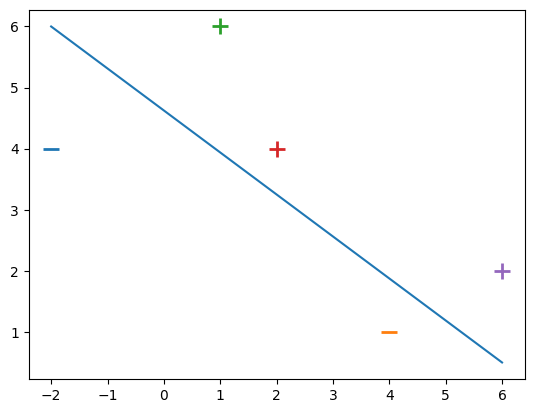

In [5]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

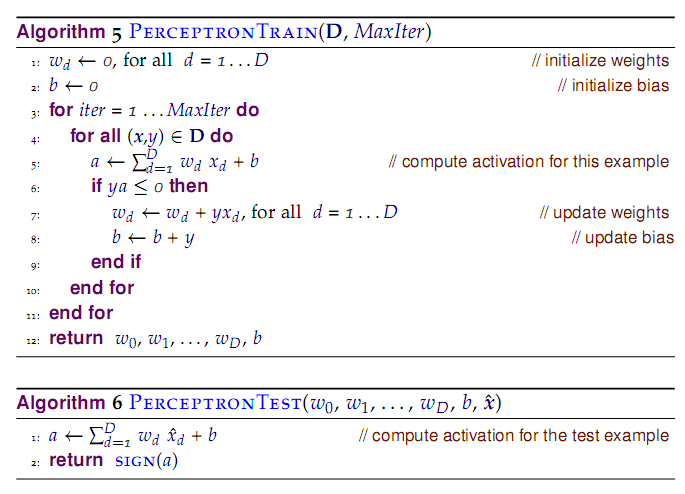

The algorithm is shown in the above image.

In [6]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [7]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

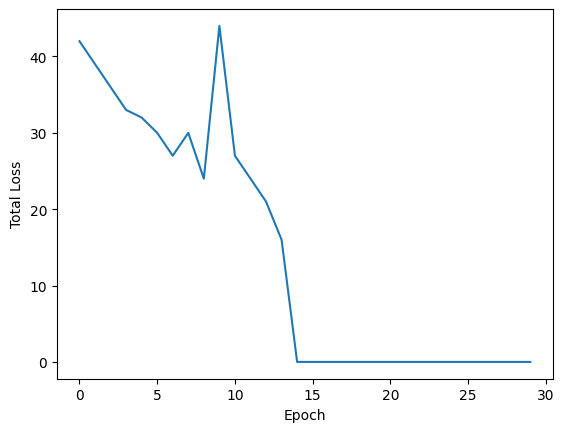

In [8]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

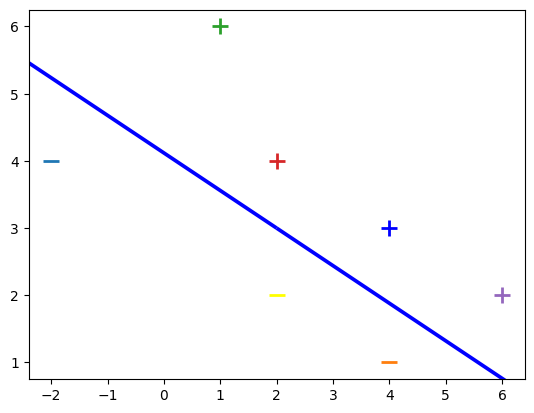

In [9]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



In [10]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [11]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


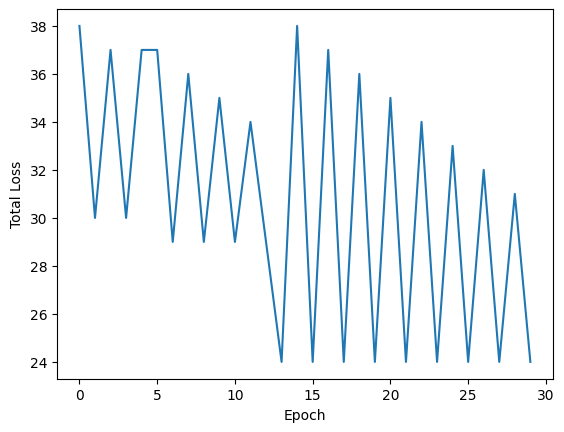

In [12]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.

**ANSWER 1:**

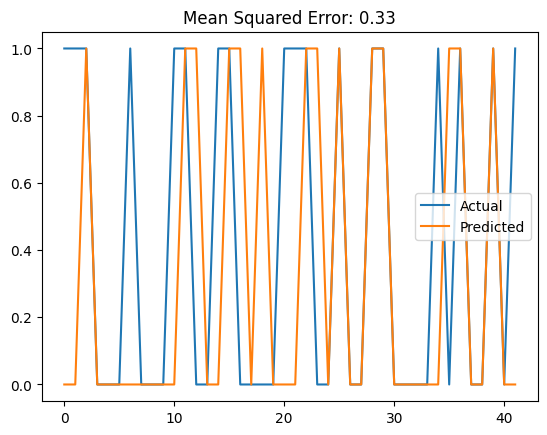

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error

# Load the Sonar dataset
# Replace this part with your code to load the actual dataset
# For example, you can use: from sklearn.datasets import fetch_openml
# sonar_data = fetch_openml(name='sonar', version=1)
# X, y = sonar_data.data, sonar_data.target

# Dummy data for illustration
np.random.seed(42)
X = np.random.rand(208, 60)
y = np.random.choice([0, 1], size=208)

# Encode labels to numerical values
le = LabelEncoder()
y = le.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Support Vector Machine (SVM) classifier
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Plot the error
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title(f'Mean Squared Error: {mse:.2f}')
plt.legend()
plt.show()


**ANSWER 2 :**

The learning rate is a hyperparameter that determines the size of the step taken during the optimization process. It plays a crucial role in the convergence of the optimization algorithm. Setting the learning rate too high can lead to overshooting, causing the algorithm to fail to converge or converge to a suboptimal solution. Conversely, setting it too low may result in slow convergence.

Here's a brief explanation of how the learning rate affects convergence:

High Learning Rate:

If the learning rate is too high, the algorithm might overshoot the minimum point and oscillate around it or even diverge. In some cases, the loss function may increase instead of decreasing. Optimal Learning Rate:

There is an optimal range for the learning rate where the algorithm converges efficiently without oscillations or divergence. Finding this optimal learning rate often involves experimentation. Low Learning Rate:

If the learning rate is too low, the algorithm may take a very long time to converge or get stuck in a local minimum. To experiment with the learning rate and observe its effects on convergence, you can run your optimization algorithm (such as gradient descent or stochastic gradient descent) with different learning rates. Track the loss over iterations and observe how quickly the algorithm converges or diverges.

Here's a simplified example using stochastic gradient descent in Python with a hypothetical dataset:

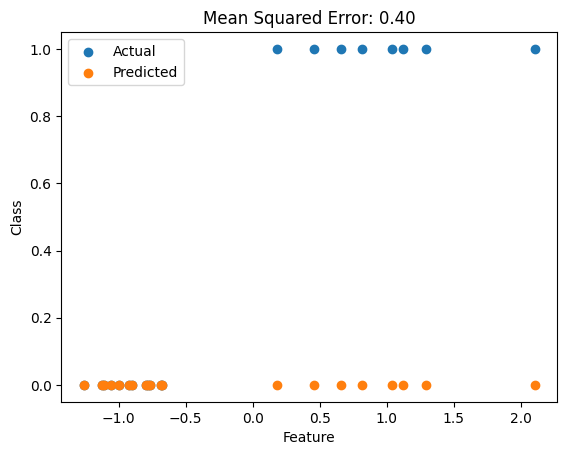

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate a hypothetical dataset
X, y = make_classification(n_samples=100, n_features=1, n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Add a column of ones to the input features for the bias term
X = np.c_[np.ones(X.shape[0]), X]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SGDClassifier with stochastic gradient descent
sgd_classifier = SGDClassifier(loss='squared_epsilon_insensitive', max_iter=1000, random_state=42)

# Train the classifier
sgd_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = sgd_classifier.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Plot the actual and predicted values
plt.scatter(X_test[:, 1], y_test, label='Actual')
plt.scatter(X_test[:, 1], y_pred, label='Predicted')
plt.title(f'Mean Squared Error: {mse:.2f}')
plt.xlabel('Feature')
plt.ylabel('Class')
plt.legend()
plt.show()


**ANSWER 3 :**

The perceptron algorithm is designed for linearly separable datasets. When applied to a dataset that is not linearly separable, the perceptron algorithm may not converge and may oscillate, failing to find a separating hyperplane.

Let's consider a simple example using the make_classification function from scikit-learn to create a non-linearly separable toy dataset:

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


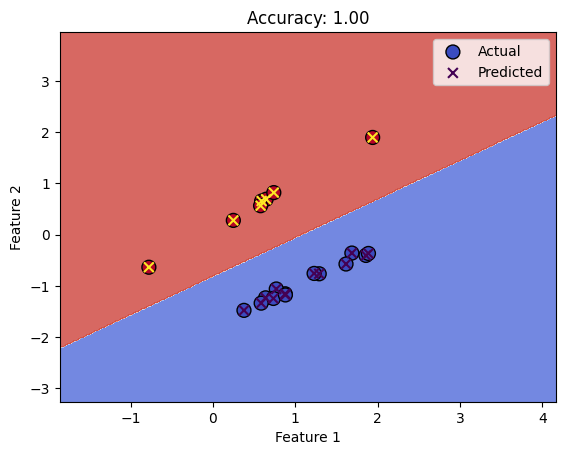

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a non-linearly separable toy dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SGDClassifier with stochastic gradient descent
sgd_classifier = SGDClassifier(loss='log', max_iter=1000, random_state=42)

# Train the classifier
sgd_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = sgd_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Plot the decision boundary
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = sgd_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot the actual and predicted values
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.coolwarm, marker='o', s=100, label='Actual')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, marker='x', s=50, label='Predicted')

plt.title(f'Accuracy: {accuracy:.2f}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
